# Week 1: Using CNN's with the Cats vs Dogs Dataset

Welcome to the 1st assignment of the course! This week, you will be using the famous `Cats vs Dogs` dataset to train a model that can classify images of dogs from images of cats. For this, you will create your own Convolutional Neural Network in Tensorflow and leverage Keras' image preprocessing utilities.

You will also create some helper functions to move the images around the filesystem so if you are not familiar with the `os` module be sure to take a look a the [docs](https://docs.python.org/3/library/os.html).

Let's get started!

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take some time to download

import wget

wget.download(
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip",
    "cats-and-dogs.zip")

local_zip = 'cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [2]:
source_path = 'PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [4]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'
root_dir = 'cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)


# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
    ### START CODE HERE

    # HINT:
    # Use os.makedirs to create your directories with intermediate subdirectories
    # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

    os.makedirs(os.path.join(root_path, 'training/cats'))
    os.makedirs(os.path.join(root_path, 'training/dogs'))
    os.makedirs(os.path.join(root_path, 'testing/cats'))
    os.makedirs(os.path.join(root_path, 'testing/dogs'))

    ### END CODE HERE


try:
    create_train_test_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# Test your create_train_test_dirs function
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

cats-v-dogs\testing
cats-v-dogs\training
cats-v-dogs\testing\cats
cats-v-dogs\testing\dogs
cats-v-dogs\training\cats
cats-v-dogs\training\dogs


Code the `split_data` function which takes in the following arguments:
- SOURCE: directory containing the files

- TRAINING: directory that a portion of the files will be copied to (will be used for training)
- TESTING: directory that a portion of the files will be copied to (will be used for testing)
- SPLIT SIZE: to determine the portion

The files should be randomized, so that the training set is a random sample of the files, and the test set is made up of the remaining files.

For example, if `SOURCE` is `PetImages/Cat`, and `SPLIT` SIZE is .9 then 90% of the images in `PetImages/Cat` will be copied to the `TRAINING` dir
and 10% of the images will be copied to the `TESTING` dir.

All images should be checked before the copy, so if they have a zero file length, they will be omitted from the copying process. If this is the case then your function should print out a message such as `"filename is zero length, so ignoring."`. **You should perform this check before the split so that only non-zero images are considered when doing the actual split.**


Hints:

- `os.listdir(DIRECTORY)` returns a list with the contents of that directory.

- `os.path.getsize(PATH)` returns the size of the file

- `copyfile(source, destination)` copies a file from source to destination

- `random.sample(list, len(list))` shuffles a list

In [27]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    ### START CODE HERE
    list_files = os.listdir(SOURCE)
    list_files = random.sample(list_files, len(list_files))
    SPLIT_INDEX = int(len(list_files) * SPLIT_SIZE) + 1
    # training copy
    for file_name in list_files[:SPLIT_INDEX]:
        file_path = os.path.join(SOURCE, file_name)
        if os.path.getsize(file_path):
            copyfile(file_path, os.path.join(TRAINING, file_name))
        else:
            print(f"{file_name} is zero length, so ignoring.")

    #   testing copy
    for file_name in list_files[SPLIT_INDEX:]:
        file_path = os.path.join(SOURCE, file_name)
        if os.path.getsize(file_path):
            # pass
            copyfile(file_path, os.path.join(TESTING, file_name))
        else:
            print(f"{file_name} is zero length, so ignoring.")

    ### END CODE HERE

In [28]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

CAT_SOURCE_DIR = "PetImages/Cat/"
DOG_SOURCE_DIR = "PetImages/Dog/"

TRAINING_DIR = "cats-v-dogs/training/"
TESTING_DIR = "cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
    for file in os.scandir(TRAINING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
    for file in os.scandir(TRAINING_DOGS_DIR):
        os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
    for file in os.scandir(TESTING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
    for file in os.scandir(TESTING_DOGS_DIR):
        os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


**Expected Output:**

```
666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.
```

```
There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing
```

Now that you have successfully organized the data in a way that can be easily fed to Keras' ImageDataGenerator, it is time for you to code the generators that will yield batches of images, both for training and validation. For this, complete the train_val_generators function below.

Something important to note is that the images in this dataset come in a variety of resolutions. Luckily, the flow_from_directory method allows you to standarize this by defining a tuple called target_size that will be used to convert each image to this target resolution. For this exercise, use a target_size of (150, 150).

Note: So far, you have seen the term testing being used a lot for referring to a subset of images within the dataset. In this exercise, all of the testing data is actually being used as validation data. This is not very important within the context of the task at hand but it is worth mentioning to avoid confusion.

In [12]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    train_datagen = ImageDataGenerator(rescale=1 / 255.)

    # Pass in the appropiate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=64,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    validation_datagen = ImageDataGenerator(rescale=1 / 255.)

    # Pass in the appropiate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=TESTING_DIR,
                                                                  batch_size=64,
                                                                  class_mode='binary',
                                                                  target_size=(150, 150))
    ### END CODE HERE
    return train_generator, validation_generator

In [13]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22497 images belonging to 2 classes.
Found 2501 images belonging to 2 classes.


One last step before training is to define the architecture of the model that will be trained.

Complete the `create_model` function below which should return a Keras' `Sequential` model.

Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is compatible with the `class_mode` you defined in the previous exercise, which should also be compatible with the output of your network. You can tell if they aren't compatible if you get an error during training.

**Note that you should use at least 3 convolution layers to achieve the desired performance.**

In [14]:
# GRADED FUNCTION: create_model
def create_model():
    # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
    # USE AT LEAST 3 CONVOLUTION LAYERS

    ### START CODE HERE

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    # model.compile(optimizer=None,
    #               loss=None,
    #               metrics=['accuracy'])

    ### END CODE HERE

    return model

In [15]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
115/352 [========>.....................] - ETA: 51s - loss: 0.7885 - accuracy: 0.5644

C:\Users\Andrew\anaconda3\envs\TF_Developer_Certificate\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


352/352 [==============================] - 90s 247ms/step - loss: 0.6526 - accuracy: 0.6472 - val_loss: 0.6052 - val_accuracy: 0.7161
Epoch 2/15
352/352 [==============================] - 23s 66ms/step - loss: 0.4898 - accuracy: 0.7647 - val_loss: 0.5061 - val_accuracy: 0.7577
Epoch 3/15
352/352 [==============================] - 23s 66ms/step - loss: 0.4113 - accuracy: 0.8141 - val_loss: 0.4059 - val_accuracy: 0.8209
Epoch 4/15
352/352 [==============================] - 23s 66ms/step - loss: 0.3423 - accuracy: 0.8494 - val_loss: 0.4326 - val_accuracy: 0.8081
Epoch 5/15
352/352 [==============================] - 23s 66ms/step - loss: 0.2798 - accuracy: 0.8814 - val_loss: 0.3843 - val_accuracy: 0.8509
Epoch 6/15
352/352 [==============================] - 26s 75ms/step - loss: 0.2159 - accuracy: 0.9128 - val_loss: 0.4396 - val_accuracy: 0.8381
Epoch 7/15
352/352 [==============================] - 26s 74ms/step - loss: 0.1553 - accuracy: 0.9378 - val_loss: 0.4128 - val_accuracy: 0.8501
Ep

Once training has finished, you can run the following cell to check the training and validation accuracy achieved at the end of each epoch.

**To pass this assignment, your model should achieve a training accuracy of at least 95% and a validation accuracy of at least 80%**. If your model didn't achieve these thresholds, try training again with a different model architecture and remember to use at least 3 convolutional layers.

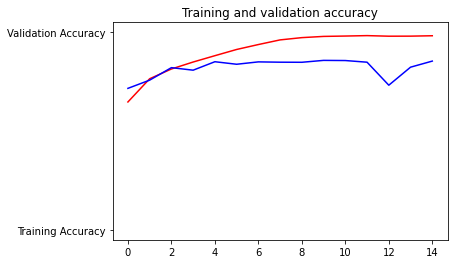

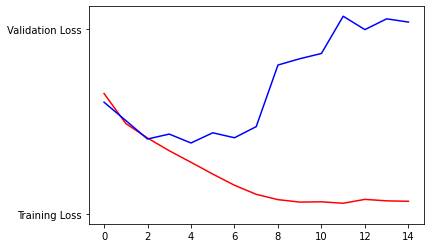

In [16]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [17]:
import pickle

with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)